# Payment Date Prediction 

### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df_orig = pd.read_csv("dataset_github.csv")
df = df_orig.copy()

In [3]:
df_orig.shape

(50000, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  int64  
 5   doc_id                  50000 non-null  int64  
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  int64  
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [5]:
### Display All the column names

In [6]:
df.columns.to_list()

['business_code',
 'cust_number',
 'name_customer',
 'clear_date',
 'buisness_year',
 'doc_id',
 'posting_date',
 'document_create_date',
 'document_create_date.1',
 'due_in_date',
 'invoice_currency',
 'document type',
 'posting_id',
 'area_business',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms',
 'invoice_id',
 'isOpen']

### Describe the entire dataset

In [7]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

In [8]:
df.isnull().mean()*100

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

#### area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

### drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [9]:
df.drop(['area_business', 'posting_id', 'invoice_id', 'document_create_date', 'isOpen', 'document type', 'document_create_date.1'], axis = 1, inplace = True)

In [10]:
df.columns.to_list()

['business_code',
 'cust_number',
 'name_customer',
 'clear_date',
 'buisness_year',
 'doc_id',
 'posting_date',
 'due_in_date',
 'invoice_currency',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms']

In [11]:
df.shape

(50000, 12)

### Find Duplicate rows from the dataframe

In [12]:
duplicate = df[df.duplicated()]
duplicate

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,12-03-2019 00:00,2019,1928870382,28-02-2019,20190315,USD,19557.41,20190228,NAH4
2400,U001,0200769623,WAL-MAR trust,28-08-2019 00:00,2019,1929758460,18-08-2019,20190902,USD,5600.41,20190818,NAH4
2584,U001,0200769623,WAL-MAR corporation,16-12-2019 00:00,2019,1930216806,04-12-2019,20191219,USD,35352.17,20191204,NAH4
3755,U001,0200769623,WAL-MAR,22-11-2019 00:00,2019,1930137035,12-11-2019,20191127,USD,2982.64,20191112,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020,2960628616,14-04-2020,20200425,CAD,82975.82,20200415,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,15-08-2019 00:00,2019,1929645942,25-07-2019,20190809,USD,6969.00,20190725,NAA8
49963,U001,0200759878,SA us,29-01-2019 00:00,2019,1928613993,13-01-2019,20190128,USD,10968.24,20190113,NAH4
49986,U001,0200772670,ASSOCIAT foundation,12-06-2019 00:00,2019,1929403090,29-05-2019,20190613,USD,155837.53,20190529,NAU5
49990,U001,0200765011,MAINES llc,06-06-2019 00:00,2019,1929365364,22-05-2019,20190606,USD,4008.05,20190522,NAA8


In [13]:
df.duplicated().sum()

np.int64(1161)

### Drop all the Duplicate Rows

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.shape

(48839, 12)

### null values in each columns

In [16]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

In [17]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year             int64
doc_id                    int64
posting_date             object
due_in_date               int64
invoice_currency         object
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms       object
dtype: object

In [18]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date              object
posting_date            object
due_in_date              int64
baseline_create_date     int64
dtype: object

In [19]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200210,USD,54273.28,20200126,NAH4
1,U001,0200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190811,USD,79656.60,20190722,NAD1
2,U001,0200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190929,USD,2253.86,20190914,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200410,CAD,3299.70,20200331,CA10
4,U001,0200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191128,USD,33133.29,20191113,NAH4


In [21]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200210,USD,54273.28,20200126,NAH4
1,U001,0200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190811,USD,79656.60,20190722,NAD1
2,U001,0200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190929,USD,2253.86,20190914,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200410,CAD,3299.70,20200331,CA10
4,U001,0200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191128,USD,33133.29,20191113,NAH4


### converting date columns into date time format

In [22]:
df["clear_date"] = pd.to_datetime(df["clear_date"], format="%d-%m-%Y %H:%M")

In [24]:
df["posting_date"] = pd.to_datetime(df["posting_date"], format="%d-%m-%Y")

In [25]:
# Convert due_in_date (YYYYMMDD format)
df["due_in_date"] = pd.to_datetime(df["due_in_date"], format="%Y%m%d")

In [26]:
# Convert baseline_create_date (YYYYMMDD format)
df["baseline_create_date"] = pd.to_datetime(df["baseline_create_date"], format="%Y%m%d")

In [27]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020,1930438491,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4
1,U001,0200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8
3,CA02,0140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4


In [28]:
df.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

In [29]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']]

,clear_date,posting_date,due_in_date,baseline_create_date
0,2020-02-11,2020-01-26,2020-02-10,2020-01-26
1,2019-08-08,2019-07-22,2019-08-11,2019-07-22
2,2019-12-30,2019-09-14,2019-09-29,2019-09-14
3,NaT,2020-03-30,2020-04-10,2020-03-31
4,2019-11-25,2019-11-13,2019-11-28,2019-11-13
...,...,...,...,...
49995,NaT,2020-04-21,2020-05-06,2020-04-21
49996,2019-09-03,2019-08-15,2019-08-30,2019-08-15
49997,2020-03-05,2020-02-19,2020-03-05,2020-02-19
49998,2019-12-12,2019-11-27,2019-12-12,2019-11-27


In [30]:
df.invoice_currency.value_counts()

invoice_currency
USD    45011
CAD     3828
Name: count, dtype: int64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [31]:
df['converted_usd']= df['total_open_amount'].where(df['invoice_currency']=='USD', df['total_open_amount']* 0.7)

In [32]:
df[['invoice_currency','total_open_amount','converted_usd']]

,invoice_currency,total_open_amount,converted_usd
0,USD,54273.28,54273.28
1,USD,79656.60,79656.60
2,USD,2253.86,2253.86
3,CAD,3299.70,2309.79
4,USD,33133.29,33133.29
...,...,...,...
49995,USD,3187.86,3187.86
49996,USD,6766.54,6766.54
49997,USD,6120.86,6120.86
49998,USD,63.48,63.48


In [33]:
df.drop(['invoice_currency', 'total_open_amount'], axis = 1, inplace = True)

In [34]:
print(df.columns.size)
df.columns.to_list()

11


['business_code',
 'cust_number',
 'name_customer',
 'clear_date',
 'buisness_year',
 'doc_id',
 'posting_date',
 'due_in_date',
 'baseline_create_date',
 'cust_payment_terms',
 'converted_usd']

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [35]:
df.isnull().any()

business_code           False
cust_number             False
name_customer           False
clear_date               True
buisness_year           False
doc_id                  False
posting_date            False
due_in_date             False
baseline_create_date    False
cust_payment_terms      False
converted_usd           False
dtype: bool

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [37]:
maindata = df[df['clear_date'].notnull()]
nulldata = df[df['clear_date'].isnull()]

In [38]:
maindata.shape

(39158, 11)

In [39]:
nulldata.shape

(9681, 11)

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Delay = clear_date - due_in_date

In [40]:
maindata['Delay'] = maindata['clear_date'] - maindata['due_in_date']
maindata[['clear_date', 'due_in_date', 'Delay']]

,clear_date,due_in_date,Delay
0,2020-02-11,2020-02-10,1 days
1,2019-08-08,2019-08-11,-3 days
2,2019-12-30,2019-09-29,92 days
4,2019-11-25,2019-11-28,-3 days
5,2019-12-04,2019-10-04,61 days
...,...,...,...
49994,2019-07-25,2019-07-25,0 days
49996,2019-09-03,2019-08-30,4 days
49997,2020-03-05,2020-03-05,0 days
49998,2019-12-12,2019-12-12,0 days


In [42]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.28
1,U001,0200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.60
2,U001,0200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.86
3,CA02,0140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.29


In [43]:
df['name_customer'].unique()

array(['WAL-MAR corp', 'BEN E ', 'MDV/ trust', ..., 'SUPERVAL ',
       'FOOD S ', 'KAGO systems'], shape=(4197,), dtype=object)

In [44]:
df['name_customer'].nunique()

4197

In [41]:
avg_delay = maindata.groupby('name_customer')['Delay'].mean(numeric_only=False)
avg_delay

name_customer
11078 us                 17 days 00:00:00
17135 associates       -10 days +00:00:00
17135 llc               -3 days +00:00:00
236008 associates       -3 days +00:00:00
99 CE                     2 days 00:00:00
                              ...        
YEN BROS corp             0 days 00:00:00
YEN BROS corporation    -1 days +12:00:00
YEN BROS llc            -2 days +00:00:00
ZARCO co                -1 days +00:00:00
ZIYAD  us                 6 days 00:00:00
Name: Delay, Length: 3889, dtype: timedelta64[ns]

In [45]:
maindata['avg_delay'] = maindata['name_customer'].map(avg_delay)
maindata[['avg_delay']]

,avg_delay
0,-3 days +07:08:49.779837776
1,19 days 00:00:00
2,8 days 02:10:54.545454545
4,-3 days +19:33:27.692307693
5,71 days 10:40:00
...,...
49994,-1 days +14:45:00
49996,-3 days +12:40:08.540925267
49997,1 days 01:08:34.285714285
49998,1 days 13:36:42.985074626


In [47]:
maindata[['name_customer','avg_delay']]

,name_customer,avg_delay
0,WAL-MAR corp,-3 days +07:08:49.779837776
1,BEN E,19 days 00:00:00
2,MDV/ trust,8 days 02:10:54.545454545
4,WAL-MAR foundation,-3 days +19:33:27.692307693
5,THE corporation,71 days 10:40:00
...,...,...
49994,C&S WH trust,-1 days +14:45:00
49996,WAL-MAR co,-3 days +12:40:08.540925267
49997,SAFEW associates,1 days 01:08:34.285714285
49998,BJ'S llc,1 days 13:36:42.985074626


In [49]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-3 days +07:08:49.779837776
1,U001,0200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,19 days 00:00:00
2,U001,0200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,8 days 02:10:54.545454545
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-3 days +19:33:27.692307693
5,CA02,0140106181,THE corporation,2019-12-04,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,71 days 10:40:00


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [50]:
maindata['avg_delay'] = maindata['avg_delay'].dt.total_seconds()

In [52]:
maindata[['avg_delay']]

,avg_delay
0,-2.334702e+05
1,1.641600e+06
2,6.990545e+05
4,-1.887923e+05
5,6.172800e+06
...,...
49994,-3.330000e+04
49996,-2.135915e+05
49997,9.051429e+04
49998,1.354030e+05


##### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 


In [53]:
maindata.drop(['Delay', 'clear_date'], axis = 1, inplace = True)

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- y "avg_delay"

- X is going to hold the source fields

In [54]:
X = maindata.drop(['avg_delay'], axis = 1)

In [55]:
y = maindata['avg_delay']

In [56]:
X_train,X_loc_test,y_train,y_loc_test = train_test_split(X,y,test_size=0.05)

In [57]:
y_loc_test

75      -188792.307692
17179   -188792.307692
11555   -169006.829268
32326     86400.000000
32342    228342.857143
             ...      
34064         0.000000
29367     11781.818182
26794   -108000.000000
14699    145440.000000
33682   -188792.307692
Name: avg_delay, Length: 1958, dtype: float64

In [58]:
X_train.shape, X_loc_test.shape, y_train.shape, y_loc_test.shape

((37200, 10), (1958, 10), (37200,), (1958,))

In [60]:
X_val,X_test,y_val,y_test = train_test_split(X_loc_test,y_loc_test,test_size=0.6)

In [61]:
X_val.shape, X_test.shape, y_val.shape, y_test.shape

((783, 10), (1175, 10), (783,), (1175,))

# Exploratory Data Analysis (EDA) 

<Axes: xlabel='avg_delay', ylabel='Density'>

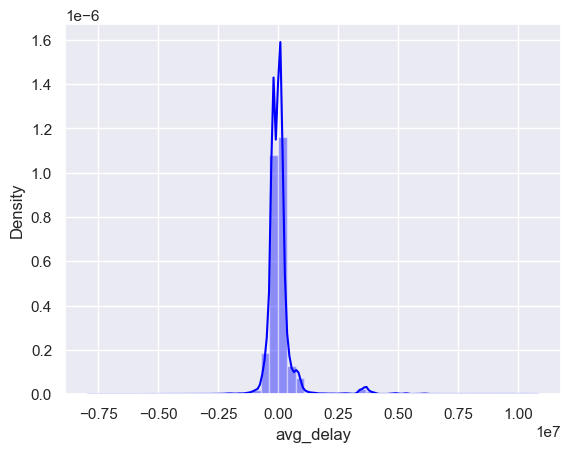

In [62]:
sns.set_theme()
sns.set_style('darkgrid')
sns.distplot(y_train,color='blue')

In [63]:
new_df = pd.DataFrame(X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count())

<Axes: xlabel='doc_id', ylabel='Density'>

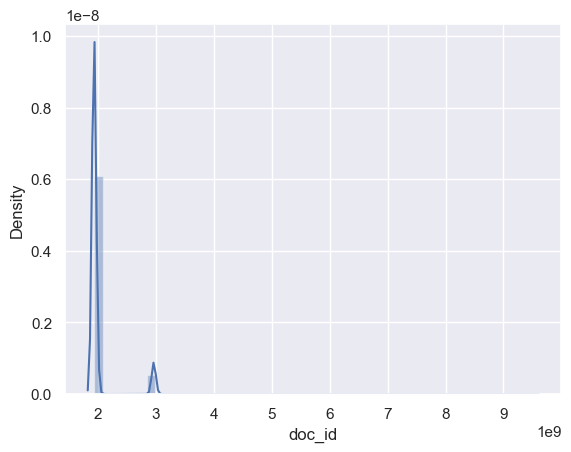

In [64]:
sns.distplot(X_train['doc_id'])

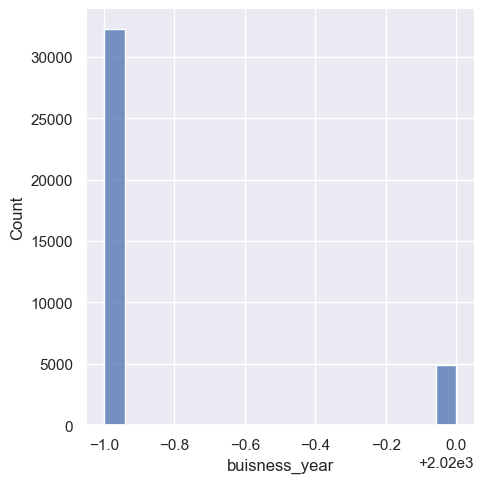

In [65]:
sns.displot(X_train['buisness_year'])

<Axes: xlabel='buisness_year', ylabel='doc_id'>

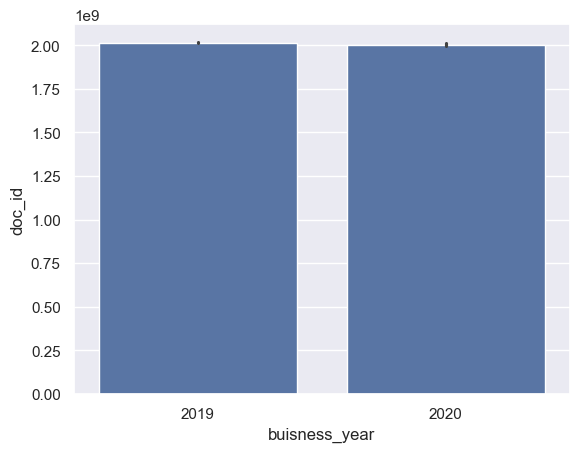

In [66]:
sns.barplot(data=X_train, x='buisness_year', y='doc_id')

# Feature Engineering 

In [67]:
X_train.describe()

,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,converted_usd
count,37200.000000,3.720000e+04,37200,37200,37200,37200.000000
mean,2019.132151,2.013713e+09,2019-07-23 12:03:56.903225856,2019-08-09 17:09:54.580644864,2019-07-23 11:46:38.709677312,30750.617904
min,2019.000000,1.928502e+09,2018-12-30 00:00:00,2018-12-24 00:00:00,2018-12-14 00:00:00,0.790000
25%,2019.000000,1.929181e+09,2019-04-11 00:00:00,2019-04-30 00:00:00,2019-04-11 00:00:00,4535.005000
50%,2019.000000,1.929734e+09,2019-07-21 00:00:00,2019-08-07 00:00:00,2019-07-21 00:00:00,16873.515000
75%,2019.000000,1.930209e+09,2019-10-28 00:00:00,2019-11-15 00:00:00,2019-10-29 00:00:00,45421.682500
max,2020.000000,9.500000e+09,2020-02-27 00:00:00,2020-06-07 00:00:00,2020-03-06 00:00:00,668593.360000
std,0.338659,2.944332e+08,NaN,NaN,NaN,36627.924281


In [68]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

In [69]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [70]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

In [71]:
X_train[['business_code', 'business_code_enc']]

,business_code,business_code_enc
40691,U001,1
49629,U001,1
24044,U001,1
34150,U013,5
12520,U001,1
...,...,...
15915,U001,1
23976,U001,1
30143,U001,1
30511,U001,1


In [72]:
X_train['business_code_enc'].unique()

array([1, 5, 0, 4, 2, 3])

In [73]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [74]:
X_train , X_val , X_test = custom(['business_code'])

In [75]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


In [76]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

In [77]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

In [78]:
X_train ,X_val, X_test = custom(['name_customer'])

In [79]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [80]:
X_train.dtypes

cust_number                        int64
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### Extracting date, month, year from dataset date features

In [81]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year

In [83]:
X_train[['day_of_postingdate']]

,day_of_postingdate
40691,16
49629,15
24044,8
34150,17
12520,6
...,...
15915,3
23976,22
30143,16
30511,3


In [84]:
X_train.head()

,cust_number,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate
40691,200759878,2019,1928619954,2019-01-16,2019-01-31,2019-01-16,NAH4,16271.79,1,2941,35,16,1,2019
49629,100052927,2019,1928971503,2019-03-15,2019-03-30,2019-03-15,NAA8,1250.73,1,277,21,15,3,2019
24044,100028450,2019,1929270890,2019-05-08,2019-05-18,2019-05-08,NA10,24753.75,1,856,11,8,5,2019
34150,37080,2019,1991828610,2019-06-17,2019-08-01,2019-06-17,NAVF,19134.95,5,1539,60,17,6,2019
12520,200778355,2020,1930473915,2020-02-06,2020-02-26,2020-02-06,NAD1,15767.76,1,3567,29,6,2,2020


In [85]:
X_train ,X_val, X_test = custom(['posting_date'])

In [86]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

In [87]:
X_train, X_val, X_test = custom(['baseline_create_date'])

In [88]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

In [89]:
X_train, X_val, X_test = custom(['due_in_date'])

In [91]:
print("X_train Datatypes :\n",X_train.dtypes)

print("\n\nX_test Datatypes :\n",X_test.dtypes)

print("\n\nX_val Datatypes :\n",X_val.dtypes)

X_train Datatypes :
 cust_number                 int64
buisness_year               int64
doc_id                      int64
cust_payment_terms         object
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int32
month_of_postingdate        int32
year_of_postingdate         int32
day_of_createdate           int32
month_of_createdate         int32
year_of_createdate          int32
day_of_due                  int32
month_of_due                int32
year_of_due                 int32
dtype: object


X_test Datatypes :
 cust_number                 int64
buisness_year               int64
doc_id                      int64
cust_payment_terms         object
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int32
month_of_postingdate        int32
year_of_postingdate      

# Feature Selection

In [93]:
X_train 

,cust_number,buisness_year,doc_id,cust_payment_terms,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
40691,200759878,2019,1928619954,NAH4,16271.79,1,2941,35,16,1,2019,16,1,2019,31,1,2019
49629,100052927,2019,1928971503,NAA8,1250.73,1,277,21,15,3,2019,15,3,2019,30,3,2019
24044,100028450,2019,1929270890,NA10,24753.75,1,856,11,8,5,2019,8,5,2019,18,5,2019
34150,37080,2019,1991828610,NAVF,19134.95,5,1539,60,17,6,2019,17,6,2019,1,8,2019
12520,200778355,2020,1930473915,NAD1,15767.76,1,3567,29,6,2,2020,6,2,2020,26,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15915,200769623,2019,1930212019,NAH4,1886.25,1,3676,35,3,12,2019,3,12,2019,18,12,2019
23976,200943275,2019,1929767327,NAA8,2193.44,1,3563,21,22,8,2019,22,8,2019,6,9,2019
30143,200744019,2019,1930157564,NAA8,7896.07,1,3420,21,16,11,2019,16,11,2019,1,12,2019
30511,200965912,2019,1928552957,NAC6,20962.98,1,516,27,3,1,2019,3,1,2019,18,1,2019


In [ ]:
X_train.drop(['cust_payment_terms'],axis=1,inplace = True)

In [106]:
X_test.drop(['cust_payment_terms'],axis=1,inplace = True)
X_val.drop(['cust_payment_terms'],axis=1,inplace = True)

In [96]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

In [97]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


In [98]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


In [99]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [100]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['year_of_due',
 'day_of_createdate',
 'year_of_postingdate',
 'year_of_createdate',
 'month_of_createdate',
 'month_of_due']

<Axes: title={'center': 'Pearson Correlation of Features'}>

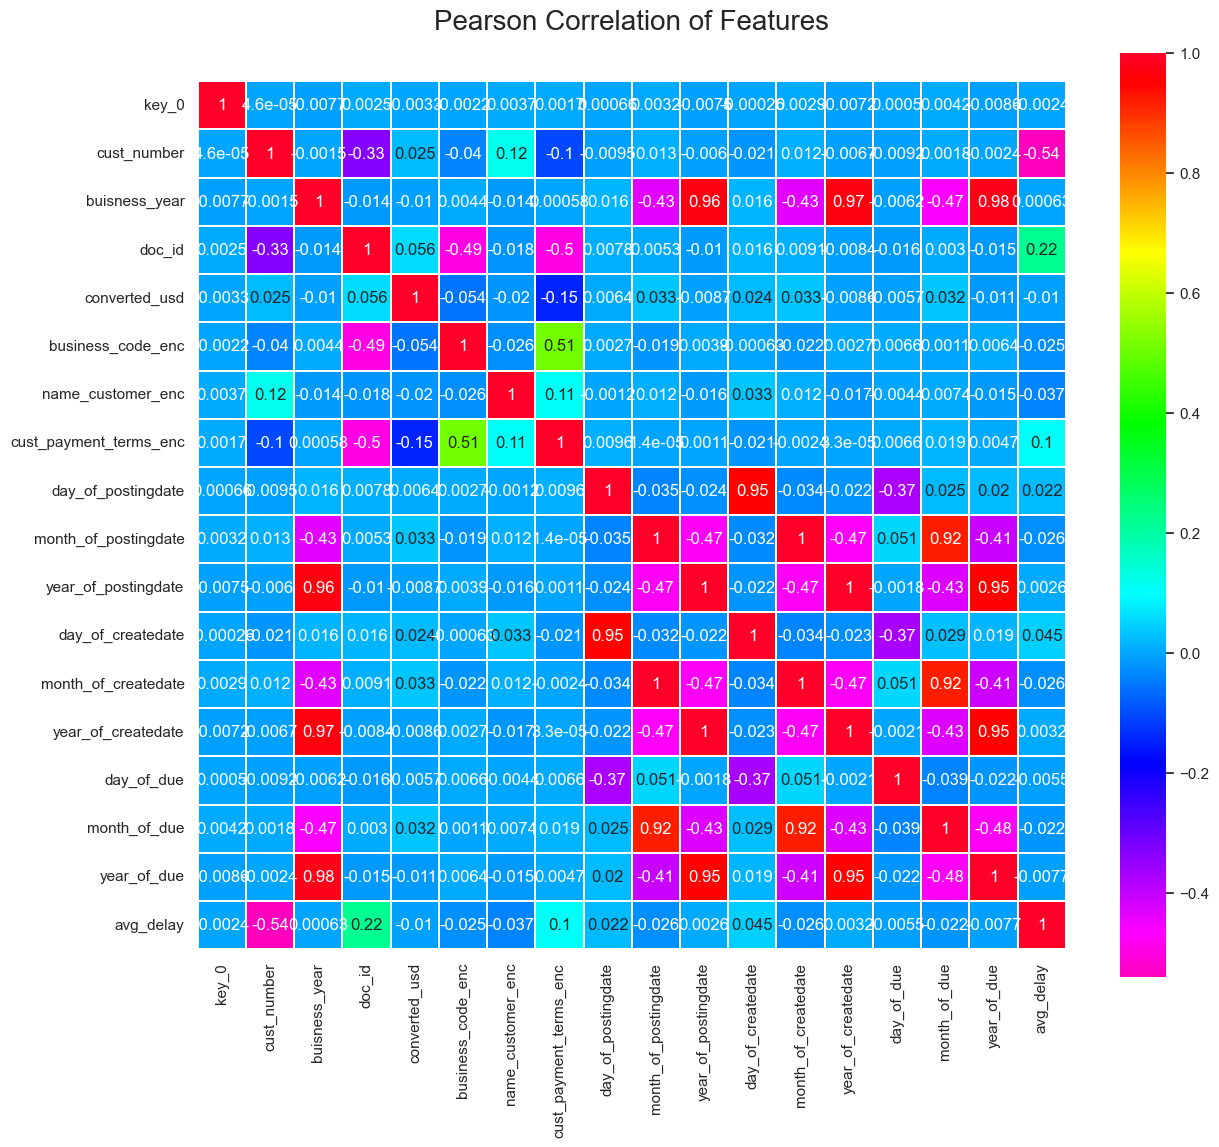

In [101]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

In [102]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [103]:
sel.variances_

array([1.77915061e+15, 1.14686773e-01, 8.66885888e+16, 1.34156877e+09,
       2.84936478e-01, 1.62286934e+06, 1.48127418e+02, 7.58910213e+01,
       1.22959834e+01, 1.15382021e-01, 7.75416595e+01, 1.23056287e+01,
       1.15577263e-01, 7.62762594e+01, 1.21148467e+01, 1.17949878e-01])

# Modelling 

#### Need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

In [146]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Linear Regression

In [147]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [148]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [149]:
predict_test= regressor.predict(X_val)


In [111]:
predict_test

array([-8.21931307e+04, -1.34808306e+05, -1.67694943e+05,  2.12270306e+05,
        5.64560228e+05, -1.46313763e+05, -1.09781452e+05, -4.82169821e+04,
        1.70697095e+04, -1.21854218e+05, -9.11280224e+04,  3.77115577e+04,
       -5.03910158e+04,  6.93847150e+04, -8.54466092e+04, -8.19964494e+04,
       -9.73986463e+04,  5.62560658e+04,  5.27467638e+04, -5.89967424e+04,
        1.35942607e+06,  4.01319761e+04,  5.61515383e+05,  6.74519862e+05,
       -9.10398588e+04,  2.14079492e+04,  4.23532482e+04, -1.20122550e+05,
        6.57523321e+05, -4.58239760e+05, -1.48424779e+05,  1.39693104e+06,
       -9.22465867e+03, -1.22115555e+05, -7.89348286e+04, -9.06797702e+04,
        2.49186288e+04, -9.70978434e+04, -1.22973730e+05,  6.69815405e+05,
       -5.41970745e+05,  5.34967553e+05,  6.54665244e+05, -1.30501586e+05,
       -8.11171694e+04, -1.11862594e+05, -8.42675089e+04, -1.43068935e+05,
       -1.17236465e+05, -1.32684029e+05, -1.15398944e+05, -7.47552037e+04,
       -5.07497546e+03, -

In [150]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[325490501663.1013],[0.31291112953241385],

## Support Vector Regression

In [151]:
from sklearn.svm import SVR
Algorithm.append('support vector Regression')
regressor= SVR()
regressor.fit(X_train, y_train)

predicted = regressor.predict(X_test)

In [152]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [153]:
predict_test2 = regressor.predict(X_val)
mean_squared_error(y_val , predict_test2)

357034865180.7467

In [154]:
for i in Algorithm, MSE_Score,R2_Score:
    print(i,end=',')

['LinearRegression', 'support vector Regression'],[325490501663.1013, 481592264647.0213],[0.31291112953241385, -0.016609343288127576],

## Decision Tree Regression

In [155]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecissionTreeRegressor')
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)

predicted = regressor.predict(X_test)

In [156]:
MSE_Score.append(mean_squared_error(y_test,predicted))
R2_Score.append(r2_score(y_test,predicted))

In [157]:
predict_test3 = regressor.predict(X_val)
mean_squared_error(y_val, predict_test3)

136793046816.65146

In [158]:
for i in Algorithm ,MSE_Score, R2_Score:
  print(i)
  print('\n')

['LinearRegression', 'support vector Regression', 'DecissionTreeRegressor']


[325490501663.1013, 481592264647.0213, 248067348291.18494]


[0.31291112953241385, -0.016609343288127576, 0.47634627349679837]




## Random Forest Regression

In [159]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandormForestRegression')
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

predicted = regressor. predict(X_test)

In [160]:
MSE_Score.append(mean_squared_error(y_test,predicted))
R2_Score.append(r2_score(y_test,predicted))

In [161]:
predict_test4 = regressor.predict(X_val)
mean_squared_error(y_val,predict_test4)

75102876592.50641

## XGBoost or Extreme Gradient Boost Regression

In [162]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [163]:
MSE_Score.append(mean_squared_error(y_test,predicted))
R2_Score.append(r2_score(y_test,predicted))

In [164]:
predict_test5 = regressor.predict(X_val)
mean_squared_error(y_val,predict_test5)

126297485565.5234

In [165]:
for i in Algorithm , MSE_Score,R2_Score:
  print(i,end='')

['LinearRegression', 'support vector Regression', 'DecissionTreeRegressor', 'RandormForestRegression', 'XGB Regressor'][325490501663.1013, 481592264647.0213, 248067348291.18494, 130923275428.94426, 230821408995.32526][0.31291112953241385, -0.016609343288127576, 0.47634627349679837, 0.7236296451885444, 0.512751308022843]

In [166]:
Comparison_list = pd.DataFrame(list(zip(Algorithm , MSE_Score ,R2_Score)), columns=['Algorithm','MSE_Score','R2_Score'])
Comparison_list

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,3.254905e+11,0.312911
1,support vector Regression,4.815923e+11,-0.016609
2,DecissionTreeRegressor,2.480673e+11,0.476346
3,RandormForestRegression,1.309233e+11,0.723630
4,XGB Regressor,2.308214e+11,0.512751


In [167]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

In [168]:
mean_squared_error(y_test,predictedfinal)


230821408995.32526

In [173]:
predict_val_testfinal = regressor.predict(X_val)
mean_squared_error(y_val, predict_val_testfinal)

126297485565.5234

In [174]:
r2_score(y_test,predictedfinal)

0.512751308022843

In [169]:
#predict trainfinal = regressorfinal.predict(X_train)
Train_Accuracy = regressorfinal.score(X_train,y_train)
print("Accuracy is:%.2f%%" %(Train_Accuracy*100.0))

Accuracy is:92.99%


In [170]:
Val_Accuracy = regressorfinal.score(X_val,y_val)
print("Accuracy is: %.2f%%"%(Val_Accuracy * 100.0))

Accuracy is: 64.35%


In [171]:
Test_Accuracy = regressorfinal.score(X_test,y_test)
print("Accuracy is: %.2f%%"% (Test_Accuracy * 100.0))

Accuracy is: 51.28%


In [175]:
Comparison_list = pd.DataFrame(list(zip(Algorithm , MSE_Score ,R2_Score)), columns=['Algorithm','MSE_Score','R2_Score'])
Comparison_list

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,3.254905e+11,0.312911
1,support vector Regression,4.815923e+11,-0.016609
2,DecissionTreeRegressor,2.480673e+11,0.476346
3,RandormForestRegression,1.309233e+11,0.723630
4,XGB Regressor,2.308214e+11,0.512751



## **Specify the Reason Behind Choosing Your Machine Learning Model**  

I have used and compared five machine learning models to identify the best-performing model.  
After applying machine learning models to the training data, it was found that **Random Forest Regressor** performed better than the other four algorithms.  

Although *XGBoost* also provided competitive results, we are selecting *Random Forest Regressor* based on accuracy and performance.  

### **The reason behind this choice:**  

1. **Random Forest Regressor is highly efficient** in handling large datasets and provides **better generalization** by reducing overfitting, making it a robust choice.  

2. **It performs exceptionally well** on structured/tabular datasets for both classification and regression tasks.  

3. From the **model comparison**, the **Random Forest Regressor** has the **highest R-squared (R² Score)** among all models. Since a higher R-squared value indicates a better fit of the model to the data, **this makes it a strong candidate for selection**.  

4. Additionally, **Random Forest Regressor has the lowest Mean Squared Error (MSE) score** compared to other models, which means it has better predictive accuracy and lower error.  

For the above reasons, I have selected **Random Forest Regressor** as the final model.  


In [176]:
X_train.shape


(37200, 16)

## Hyperparameter Tuning with RandomizedSearchCV

In [178]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score


param_dist = {
    'n_estimators': [50, 100, 200],       
    'max_depth': [10, 20, None],          
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4],       
    'max_features': ['sqrt', 'log2'],     
    'bootstrap': [True]      
}            

# Initialize the model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Perform Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  
    cv=3,  
    scoring='r2',  
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best Parameters:", random_search.best_params_)

# Train final model with best parameters
best_rf = RandomForestRegressor(**random_search.best_params_, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


RandomForestRegressor(max_features='sqrt', n_jobs=-1, random_state=42)

In [179]:
predicted = best_rf.predict(X_test)

In [180]:
Algorithm.append('Hyper tunned RandomForest')

In [181]:
MSE_Score.append(mean_squared_error(y_test,predicted))
R2_Score.append(r2_score(y_test,predicted))

In [182]:
Comparison_list = pd.DataFrame(list(zip(Algorithm , MSE_Score ,R2_Score)), columns=['Algorithm','MSE_Score','R2_Score'])
Comparison_list

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,3.254905e+11,0.312911
1,support vector Regression,4.815923e+11,-0.016609
2,DecissionTreeRegressor,2.480673e+11,0.476346
3,RandormForestRegression,1.309233e+11,0.723630
4,XGB Regressor,2.308214e+11,0.512751
5,Hyper tunned RandomForest,1.483841e+11,0.686771


## Conclusion

### Hyper paramter tunning reduced the R2 score .need to select the proper hyper parameters or select the different model like XGB boost